# Анализ данных о продажах игр

Исследованию подлежат данные о продажах компьютерных игр в интернет-магазине за период до 2016 года. Для выявления потенциально популярных продуктов нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные содержат оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Этапы проведения исследования следующие.

- Предобработка данных:
    - Замена названий столбцов (приведение к нижнему регистру);
    - Обработка пропусков;
    - Преобразование данных в нужные типы;
    - Расчет суммарных продаж во всех регионах.
    
- Исследовательский анализ данных:
    - Анализ количества выпущенных игр в разные годы.
    - Распределение проданных игр по платформам. Распределение по годам для платформ с наибольшими суммарными продажами.
    - Определние актуального периода для прогноза на 2017 год.
    - Анализ платформ, которые лидируют по продажам, а также продажи которых растут или падают. Опредление потенциально прибыльных платформ.
    - Анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - Исследование влияния  оценок пользователей и критиков на продажи внутри одной популярной платформы. 
    - Сравнение полученных выводов с продажами игр на других платформах.
    - Анализ общего распределения игр по жанрам. 
    
- Составление портрета пользователя каждого региона. Нужно определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияние рейтинга ESRB на продажи в отдельном регионе.
    
- Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Изучение общей информации

Импорт библиотек:

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats as st

Чтение csv-файла:

In [467]:
data = pd.read_csv('games.csv')

Изучение общей информации о таблице:

In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов, 16 715 строк.

Выведем первые 5 строк таблицы:

In [469]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датасет состоит из следующих столбцов: 

- `'Name'` — название игры;
- `'Platform'` — платформа;
- `'Year_of_Release'` — год выпуска;
- `'Genre'` — жанр игры;
- `'NA_sales'` — продажи в Северной Америке (миллионы проданных копий);
- `'EU_sales'` — продажи в Европе (миллионы проданных копий);
- `'JP_sales'` — продажи в Японии (миллионы проданных копий);
- `'Other_sales'` — продажи в других странах (миллионы проданных копий);
- `'Critic_Score'` — оценка критиков (максимум 100);
- `'User_Score'` — оценка пользователей (максимум 10);
- `'Rating'` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Названия столбцов необходимо привести к нижнему регистру. В данных имеются пропуски. Формат некоторых столбцов не соответствует содержимому. 

### Предобработка данных

#### Замена названий столбцов (приведение к нижнему регистру)

Для этого с помощью атрибута `columns` заменим названия столбцов на те же, но приведенные к нижнему регистру методом `lower()`.

In [470]:
data.columns = data.columns.str.lower()

Выведем новые названия столбцов на экран.

In [471]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Работа с типами данных

Еще раз выведем информацию о данных:

In [472]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем первые 10 строк таблицы:

In [473]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Столбцы, в которых нужно изменить тип данных: 
- `'year_of_release'`
- `'critic_score'`
- `'user_score'`

##### Столбец `'year_of_release'`

В столбце указан год выпуска игры, тип данных `float64` нужно поменять на `int64` методом  `astype()` и в качестве аргумента передать ему `'Int64'`, так как в столбце есть пропуски.

In [474]:
data['year_of_release'] = data['year_of_release'].astype('Int32')

##### Столбец `'critic_score'`

В столбце указана целочисленная оценка критиков, поэтому тип данных `float64` нужно поменять на `int64` методом  `astype()` и в качестве аргумента передать ему `'Int64'`, так как в столбце есть пропуски.

In [475]:
data['critic_score'] = data['critic_score'].astype('float64')

##### Столбец `'user_score'`

В столбце указаны дробные оценки пользователей, поэтому тип данных `object` нужно поменять на `float64`. проверим список уникальных значений в этом столбце методом `unique()`.

In [476]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура `'tbd'` расшифровывется как 'To Be Determined' и означает, что значение еще не определено. Проверим, какой наиболее ранний и наиболее поздний год выпуска соответствует игре с таким значением в столбце `'user_score'`.

In [477]:
print(data.query('user_score == "tbd"')['year_of_release'].describe())

count    2376.000000
mean     2007.450337
std         3.484229
min      1997.000000
25%      2005.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64


Значение `'tbd'` не связано с тем, что игра вышла недавно и оценка еще не выставлена. Значит, это можно трактовать как отсутствие оценки вовсе. Поэтому заменим `'tbd'` на `NaN`, чтобы не искажать данные. Для этого параметру метода `to_numeric()` передадим в качестве аргумента `'coerce'`.

In [478]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

Выведем количество пропусков.

In [479]:
data['user_score'].isna().sum()

9125

Проверим типы данных.

In [480]:
data.dtypes

name                object
platform            object
year_of_release      Int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

#### Обработка пропусков

Вывод списка, который содержит названия столбцов с пропусками.

Методом `dropna()` удаляем из данных столбцы с пропусками, атрибутом `columns` возвращаем список оставшихся столбцов. Затем методом `drop()` удаляем из данных столбцы по этому списку, то есть те, в которых нет пропусков, и атрибутом `columns` возврящаем список оставшихся столбцов.

In [481]:
print(data.drop(columns=data.dropna(axis='columns').columns).columns)

Index(['name', 'year_of_release', 'genre', 'critic_score', 'user_score',
       'rating'],
      dtype='object')


##### Столбец `'name'`

Найдем количество пропусков.

In [482]:
print(data['name'].isna().sum())

2


Скорее всего, пропуски полностью случайные. Пропуска всего два, поэтому строки можно удалить методом `'dropna()'`.

In [483]:
data = data.dropna(subset=['name']).reset_index(drop=True)

##### Столбец `'year_of_release'` 

Найдем количество пропусков.

In [484]:
print(data['year_of_release'].isna().sum())

269


Вероятно, пропуски полностью случайные. Проверим, есть ли у каких-то игр и указанный год выпуска, и ячейки с пропущенными значениями.

Запишем назвния игр, у которых есть пропуски в столбце `'year_of_release'`, в список `games_with_nans` и выведем его длину.

In [485]:
games_with_nans = data.loc[data['year_of_release'].isna()]['name'].unique()

len(games_with_nans)

232

Сформируем таблицу `number_of_unique_years`, где для каждой игры с пропусками будет указано количество уникальных значений в столбце `'year_of_release'`. Методом `query()` выбираем срез игр, которые есть в списке `games_with_nans` (игры с пропущенными годами выпуска), методом `groupby()` группируем игры по названию, методом `agg()` создаем столбец `'number'`, в который записываем количество уникальных значений. Выведем первые 5 строк на экран.

In [486]:
number_of_unique_years = (data.query('name in @games_with_nans')
                          .groupby(['name'])
                          .agg(number = ('year_of_release','nunique')))

number_of_unique_years.head()

,number
name,
AKB1/48: Idol to Guam de Koishitara...,1
Action Man-Operation Extreme,0
Advance Wars: Days of Ruin,0
Adventure,0
Agarest Senki: Re-appearance,0


Для игр, у которых только одно уникальное значение года выпуска, пропуски можно заменить на это значение. Сформируем таблицу для этих игр и указанных годов выпуска. Методом `query()` выбираем срез игр, которые есть в таблице `number_of_unique_years` и у которых только одно уникальное значение года выпуска, при этом из основной таблицы `data` выбираем только строки без пропусков в столбце `'year_of_release'`. В полученном срезе игры могут встречаться несколько раз, но значение года выпуска у каждой будет только одно. Методом `groupby()` группируем игры по названию и присваиваем каждой строке значение года выпуска методом `min()`, так как все значения одинаковые. 

Выведем первые 5 строк.

In [487]:
games_with_one_year = (data[~data['year_of_release'].isna()]
                       .query('name in @number_of_unique_years.query("number == 1").index.to_list()')
                       .groupby('name')['year_of_release']
                       .min())

games_with_one_year.head()

name
AKB1/48: Idol to Guam de Koishitara...    2011
Aquaman: Battle for Atlantis              2003
Battle vs. Chess                          2011
Bejeweled 3                               2010
BioShock 2                                2010
Name: year_of_release, dtype: Int32

Проведем замену для этих игр с помощью цикла по всем строкам таблицы `data`.

In [488]:
for _ in range(data.shape[0]):
    
    if data.loc[_,'name'] in games_with_one_year.index:
        
        data.loc[_,'year_of_release'] = games_with_one_year[data.loc[_,'name']]

Проверим количество пропусков.

In [489]:
print(data['year_of_release'].isna().sum())

158


Пропусков немного, поэтому их можно удалить.

In [490]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

##### Столбец `'genre'`

Найдем количество пропусков.

In [491]:
print(data['genre'].isna().sum())

0


Пропуски были в тех строках, где были пропуски в столбце `'name'`.

##### Столбец `'critic_score'` 

Вероятно, пропуски случайные - данных об оценке критиков нет. Найдем количество пропусков.

In [492]:
print(data['critic_score'].isna().sum())

8487


Средние оценки могут отличаться по жанрам, платформам, годам и другим параметрам, поэтому пропуски лучше оставить. Для удобства дальнейшей работы заменим пропуски на -1.

In [493]:
data['critic_score'] = data['critic_score'].fillna(-1)

##### Столбец `'user_score'`

Эти пропуски, вероятно, тоже случайные - данных об оценке пользователей нет. Часть из этих пропусков обусловлена заменой значения `'tbd'`. Найдем количество пропусков.

In [494]:
print(data['user_score'].isna().sum())

9020


Аналогично и здесь - средние оценки могут отличаться по жанрам, платформам, годам и другим параметрам, поэтому пропуски лучше оставить. Для удобства дальнейшей работы заменим пропуски на -1.

In [495]:
data['user_score'] = data['user_score'].fillna(-1)

##### Столбец `'rating'`

Скорее всего, пропуски в этом столбце тоже случайные, связаны с отсутствием данных. Найдем количество пропусков.

In [496]:
print(data['rating'].isna().sum())

6695


Запишем назвния игр, у которых есть пропуски в столбце `'rating'`, в список `games_with_nans` и выведем его длину.

In [497]:
games_with_nans = data.loc[data['rating'].isna()]['name'].unique()

len(games_with_nans)

5787

Для игр, у которых только одно уникальное значение года выпуска, пропуски можно заменить на это значение. Сформируем таблицу из игр, у которых есть и пропуски, и рейтинг, запишем для них указанный рейтинг и выведем первые 5 строк на экран.

Методом `query()` выбираем срез игр, которые есть в списке `games_with_nans`, при этом из основной таблицы `data` выбираем только строки без пропусков в столбце `'rating'`. В полученном срезе игры могут встречаться несколько раз, но значение рейтинга у каждой будет только одно. Методом `groupby()` группируем игры по названию и присваиваем каждой строке значение рейтинга методом `min()`, так как все значения одинаковые. 

In [498]:
games_with_rating = (data[~data['rating'].isna()].query('name in @games_with_nans')
                                                 .groupby(['name'])['rating'].min())

games_with_rating.head()

name
007: Quantum of Solace               T
007: The World is not Enough         T
50 Cent: Bulletproof                 M
50 Classic Games                     E
Agatha Christie's The ABC Murders    T
Name: rating, dtype: object

Для этих игр пропуски можно заменить на указанное значение с помощью цикла по всем строкам таблицы `data`.

In [499]:
for _ in range(data.shape[0]):
    
    if data.loc[_,'name'] in games_with_rating.index:
        
        data.loc[_,'rating'] = games_with_rating[data.loc[_,'name']]

Проверим количество пропусков.

In [500]:
print(data['rating'].isna().sum())

6263


Эти пропуски придется оставить. Для удобства дальнейшей работы заменим пропуски на пустую строку.

In [501]:
data['rating'] = data['rating'].fillna('')

#### Расчет суммарных продаж во всех регионах.

Добавим отдельный столбец с суммарными продажами во всех регионах. Методом `sum()` сложим значения в столбцах `'na_sales'`, `'eu_sales'`, `'jp_sales'`, `'other_sales'`.

In [502]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

### Исследовательский анализ данных

#### Анализ количества выпущенных игр в разные годы.

Для начала изучим общую характеристику данных в столбце `'year_of_release'`.

Создадим таблицу с годами первых релизов игр `first_release`. Методом `groupby()` сгруппируем таблицу по играм и выберем минимальное значение из столбца `'year_of_release'` для каждой игры, исключая пропуски, так как нас интересует только первый релиз.

In [503]:
first_release = (data[data['year_of_release'] != -1]
                 .groupby(['name'])
                 .agg(year_of_release = ('year_of_release','min')))

first_release.describe()

,year_of_release
count,11426.000000
mean,2005.658848
std,6.161291
min,1980.000000
25%,2002.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


Медианное значение соответствует 2007 году, среднее - 2006. Величина стандартного отклонения равна 6 годам. Годы релиза распределены от 1980 года до 2016.

Рассмотрим зависимость количества выпущенных игр от года выпуска на графике. Методом `value_counts()` найдем, сколько раз встречается каждый год в таблице `year_of_release`, методом `sort_index()` отсортируем года по возрастанию и построим график методом `plot()`.<a id='3.1_plot'></a>

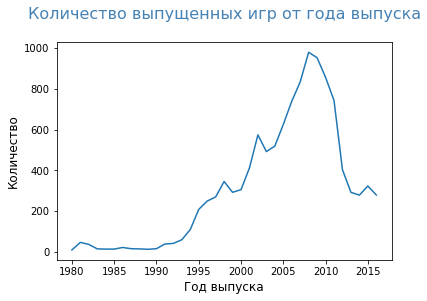

In [504]:
(first_release['year_of_release']
    .value_counts()
    .sort_index()
    .plot()
    .set_title('Количество выпущенных игр от года выпуска' + "\n",
               fontsize = 16, 
               color = 'SteelBlue'))

plt.xlabel('Год выпуска',fontsize = 12)
plt.ylabel('Количество',fontsize = 12)
plt.show()

Найдем моду среди годов выпуска.

In [505]:
first_release['year_of_release'].mode()

0    2008
dtype: Int64

С 1980 года количество выпускаемых игр в год преимущественно растет, в 2008 году достигает максимума и затем резко падает. Это может быть связано с тем, что сначала компьютерные игры были простые, эта сфера интенсивно развивалась и количество выпускаемых игр росло, так как на их создание уходило не слишком много времени. После 2008 года тенденция изменилась: игры стали развиваться экстенсивно, они стали более сложными и масштабными, на их создание стало уходить значительно больше времени.

По графику видно, что к 1995 году произошел резкий рост количества выпускаемых игр, до этого года игр было значительно меньше. 

#### Распределение проданных игр по платформам. Распределение по годам для платформ с наибольшими суммарными продажами.

Сгруппируем игры по платформам методом `groupby()` и просуммируем ячейки в столбце `'total_sales'` методом `agg()`. Запишем полученную таблицу в переменную `sales_by_platforms` и выведем ее характерные значения методом `describe()`.

In [506]:
sales_by_platforms = data.groupby(['platform']).agg(total_sales = ('total_sales','sum'))

sales_by_platforms.describe()

,total_sales
count,31.000000
mean,285.868710
std,346.419435
min,0.030000
25%,22.150000
50%,200.040000
75%,303.250000
max,1245.960000


Медианное количество продаж составляет 200 млн. экземпляров, среднее - 286 млн. экземпляров. Стандартное отклонение - 348 млн. экземпляров - больше медианы и среднего, это связано с большим разбросом величин. Диапазон величин - от минимального в 30 тыс. экземпляров до максимального в 1,256 млрд экземпляров.

Для наглядной визуализации отсортируем платформы по количеству продаж методом `sort_values()` и построим столбчатую диаграмму методом `plot()`.

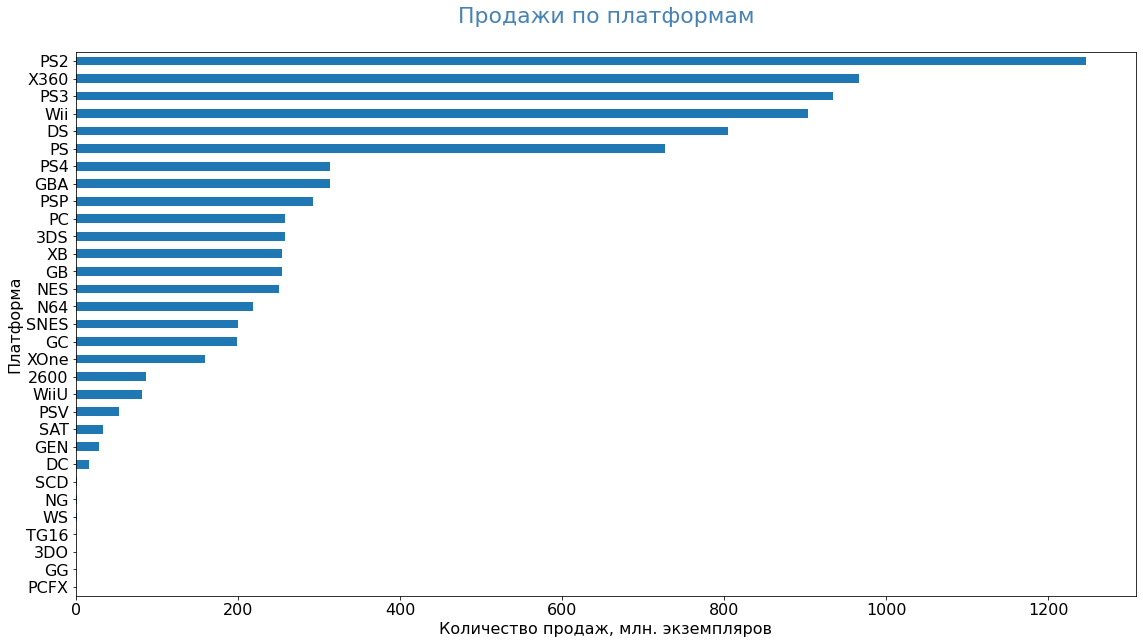

In [507]:
(sales_by_platforms.sort_values(by = 'total_sales',
                                ascending = True)
                   .plot(kind= 'barh', 
                         figsize=(19,10), 
                         legend = False, 
                         fontsize = 16)
                   .set_title('Продажи по платформам\n', 
                              fontsize = 22, 
                              color = 'SteelBlue'))

plt.xlabel('Количество продаж, млн. экземпляров',fontsize = 16)
plt.ylabel('Платформа',fontsize = 16)
plt.show()

По графику видно, что есть платформы, продажи по которым сильно отличаются от медианы и среднего как в большую, так и в меньшую стороны. К платформам с наибольшими продажами можно отнести первые шесть платформ, так как продажи по ним сильно превышают остальные. Найдем их из таблицы `sales_by_platforms`, запишем в переменную `top_six_platforms` и выведем на экран.

In [508]:
top_six_platforms = (sales_by_platforms.sort_values(by = 'total_sales',
                                                    ascending = False)
                                       .head(6)
                                       .index)

print(top_six_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


Проанализируем изменение продаж на этих платформах с годами.

Создадим срез таблицы `data` методом `query()` из игр, перечисленных выше, исключая строки с пропусками в столбце `'year_of_release'`. Для этого среза создадим сводную таблицу продаж методом `pivot_table()`, где индексами являются годы, столбцами - платформы. Выведем первые 10 строк таблицы.

In [509]:
(data[data['year_of_release'] != -1].query('platform in @top_six_platforms')
                                    .pivot_table(index='year_of_release',
                                                 columns='platform',
                                                 values='total_sales',
                                                 aggfunc='sum')
                                    .head(10))

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


Значение `0.02` в 1985 году для платформы `'DS'` является аномалией, так как после 1985 года в течение нескольких лет нет никаких релизов. Проверим, сколько таких строк в таблице `data`.

In [510]:
data[data['year_of_release'] == 1985].query('platform == "DS"')['name'].count()

1

Эту строку лучше удалить методом `drop()`.

In [511]:
data.drop(data[data['year_of_release'] == 1985].query('platform == "DS"')['name'].index.to_list(),
          inplace=True)
data.reset_index(drop=True,inplace=True)

Построим график методом `plot()`.<a id='3.2_plot'></a>

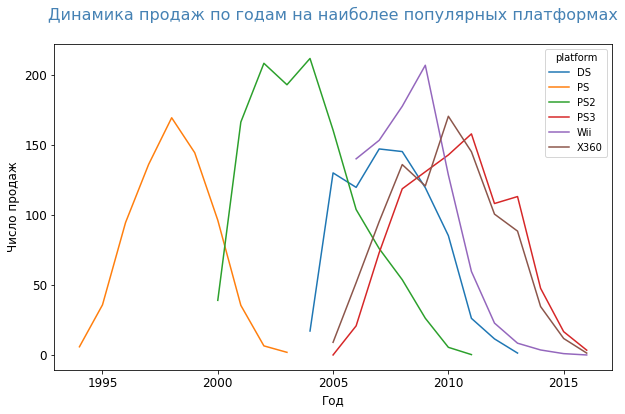

In [512]:
(data[data['year_of_release'] != -1].query('platform in @top_six_platforms')
     .pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum')
     .plot(figsize=(10,6),
           fontsize = 12))

plt.title('Динамика продаж по годам на наиболее популярных платформах\n',
          fontsize = 16, 
          color = 'SteelBlue')
plt.xlabel('Год',fontsize = 12)
plt.ylabel('Число продаж',fontsize = 12)
plt.show()

Найдем среднее время жизни платформы. Создадим таблицу `lifetime` с годом первого и последнего релиза на платформах из списка `top_six_platforms` и найдем среднее для их разности.

In [513]:
lifetime = (data[data['year_of_release'] != -1].query('platform in @top_six_platforms')
                                               .groupby(['platform'])
                                               .agg(first_year = ('year_of_release','min'),
                                                    last_year = ('year_of_release','max')))

(lifetime['last_year'] - lifetime['first_year']).mean()

10.166666666666666

Среднее время жизни платформы - 10 лет.

#### Определние актуального периода для прогноза на 2017 год.

С учетом того, что формат игр сильно изменился с момента зарождения этой сферы, для прогноза продаж на 2017 год лучше взять тот период, на котором тенденция изменения продаж сохраняется примерно постоянной. На [графике динамики общих продаж](#3.1_plot) видно, что к 2013 году резкое падение количества продаж замедляется и затем продажи изменяются слабо. 

Также по [графику с динамикой продаж по годам на наиболее популярных платформах](#3.2_plot) видно, что продажи для них к 2016 году очень упали, срок их существования либо завершился, либо близок к завершению. Поэтому лучше исследовать лишь последние несколько лет, чтобы больший вклад в продажи был обусловлен более новыми платформами. Так как средний срок существования платформы - 10 лет, лучше взаять для анализа последние 4-5 лет, чтобы оценить актуальность платформы.

Актуальным примем период с 2013 по 2016 год. Удалим из таблицы `data` данные за предыдущие годы и выведем общую информацию о таблице.

In [514]:
data = data.drop(data[data['year_of_release'] < 2013].index).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2236 non-null   object 
 1   platform         2236 non-null   object 
 2   year_of_release  2236 non-null   Int32  
 3   genre            2236 non-null   object 
 4   na_sales         2236 non-null   float64
 5   eu_sales         2236 non-null   float64
 6   jp_sales         2236 non-null   float64
 7   other_sales      2236 non-null   float64
 8   critic_score     2236 non-null   float64
 9   user_score       2236 non-null   float64
 10  rating           2236 non-null   object 
 11  total_sales      2236 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 203.2+ KB


#### Анализ платформ, которые лидируют по продажам, а также продажи которых растут или падают. Опредление потенциально прибыльных платформ.

Найдем количество оставшихся платформ.

In [515]:
data['platform'].nunique()

11

Построим для них график, отображающий динамику изменения продаж.

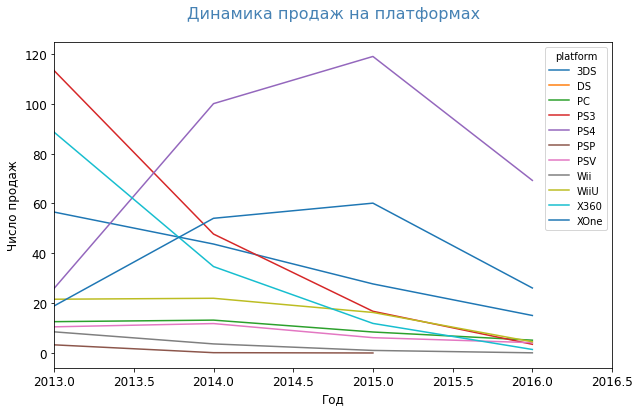

In [516]:
(data.pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum')
     .plot(figsize=(10,6),
           xlim=(2013,2016.5),
           fontsize = 12))

plt.title('Динамика продаж на платформах\n',
          fontsize = 16, 
          color = 'SteelBlue')
plt.xlabel('Год',fontsize = 12)
plt.ylabel('Число продаж',fontsize = 12)
plt.show()

Выведем продажи по платформам за 2016 год, отсортируем их по убыванию.

In [517]:
(data[data['year_of_release'] == 2016].groupby('platform')['total_sales']
                                      .sum()
                                      .sort_values(ascending = False))

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

Лидируют по продажам платформы `'PS4'`, `'XOne'`, `'3DS'`. Однако по всем трем платформам продажи падают. За период 2013 - 2016 годы платформы `'PS4'` и `'XOne'` прошли через максимум, а продажи для платформы `'3DS'` уменьшаются монотонно и медленнее, чем для `'PS4'` и `'XOne'`.

Изучим детальнее изменение продаж на платформах с 2015 на 2016 год.

In [518]:
data[data['year_of_release'] >= 2015].pivot_table(index='platform',
                                                  columns='year_of_release',
                                                  values='total_sales',
                                                  aggfunc='sum')

year_of_release,2015,2016
platform,,
3DS,27.78,15.14
PC,8.52,5.25
PS3,16.82,3.60
PS4,118.90,69.25
PSP,0.12,NaN
PSV,6.25,4.25
Wii,1.14,0.18
WiiU,16.35,4.60
X360,11.96,1.52


По всем платформам продажи падают, но по некоторым платформам они падают медленнее, из-за чего они могут выходить вперед.

Платформа `'PSP'` уже прекратила свое существование, так как в 2016 году продаж не было. Существование платформ `'Wii'`, `'X360'`, `'PS3'` и `'WiiU'` подходит к завершению, продажи будут уменьшаться, но нельзя утверждать, что в 2017 году их не будет совсем.

По [графику с динамикой продаж по годам на наиболее популярных платформах](#3.2_plot) также видно, что к концу срока существования платформы скорость падения продаж уменьшается. А с появлением популярной платформы продажи резко растут.

Отсюда можно предположить, что на первом месте все равно останется платформа `'PS4'`, дальше будут платформы `'XOne'` и `'3DS'`, а на четвертом месте останется платформа `'PC'`.

Продажи на менее популярной платформе `'PSV'` изменяются очень медленно, поэтому, сокрее всего, эта платформа будет на пятом месте.

#### Анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Запишем названия четырех наиболее актуальных платформ в список `top_four_platforms`.

In [519]:
top_four_platforms = ['PS4','XOne','3DS','PC']

Построим для этих платформ диаграммы размаха.

Для этого методом `query()` выберем из таблицы `data` только нужные платформы. Сформируем сводную таблицу, где по столбцам будут платформы, по индексам - названия игр, значениями будут продажи. По полученной таблице методом потсроим диаграмму размаха.

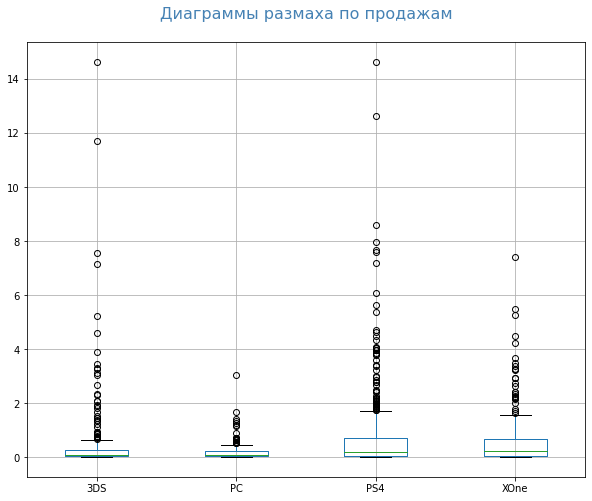

In [520]:
(data.query('platform in @top_four_platforms')
     .pivot_table(index='name',columns='platform',values='total_sales')
     .boxplot(figsize=(10,8)))

plt.title('Диаграммы размаха по продажам' + "\n",
          fontsize = 16, 
          color = 'SteelBlue')
plt.show()

Построим график для более детального сравнения диаграмм размаха.

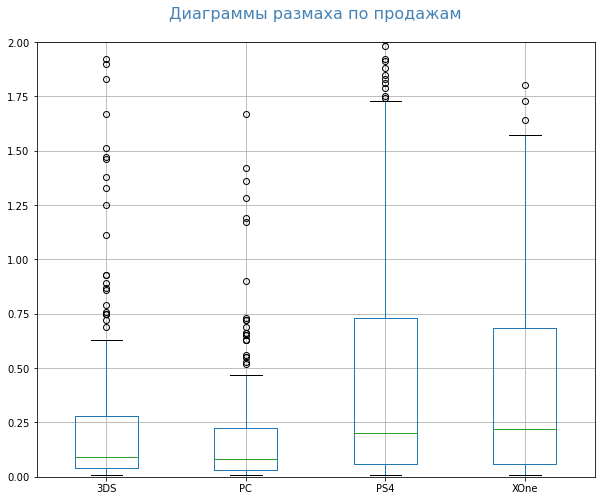

In [521]:
(data.query('platform in @top_four_platforms')
     .pivot_table(index='name',columns='platform',values='total_sales')
     .boxplot(figsize=(10,8)))

plt.ylim(0,2)

plt.title('Диаграммы размаха по продажам' + "\n",
          fontsize = 16, 
          color = 'SteelBlue')
plt.show()

Для всех платформ продажи распределены по играм неравномерно - есть игры с сильно завышенными продажами. Особенно это выражено для игровых приставок. Для ПК это выражено меньше. Наибольший разброс относительно полуторного межквартильного размаха наблюдается у портативной приставки `'3DS'`. У приставок `'PS4'` и `'XOne'` квартили находятся примерно на одном уровне, а выбросы у `'PS4'` почти в два раза больше.

Распределения игр по продажам для всех платформ смещены вправо. На платформах `'PS4'` и `'XOne'` доля игр с более высокими продажами больше, чем на платформах `'3DS'` и `'PC'`. Медианные продажи также больше на платформах `'PS4'` и `'XOne'`.

Можно утверждать, что основная прибыль на игровых приставках обеспечивается небольшим количеством очень успешных игр.

#### Исследование влияния оценок пользователей и критиков на продажи внутри одной популярной платформы.


Наиболее популярной платформой является `'PS4'`. Сначала исследуем влияние отзывов пользователей на продажи. Найдем коэффициент корреляции Пирсона между продажами и оценкой пользователей методом `corr()`, исключая пропуски.

In [522]:
data.query('platform == "PS4" and user_score != -1')['total_sales'].corr(data['user_score'])

-0.031957110204556424

Какой-либо существенной линейной связи нет. Изучим диаграмму рассеяния.

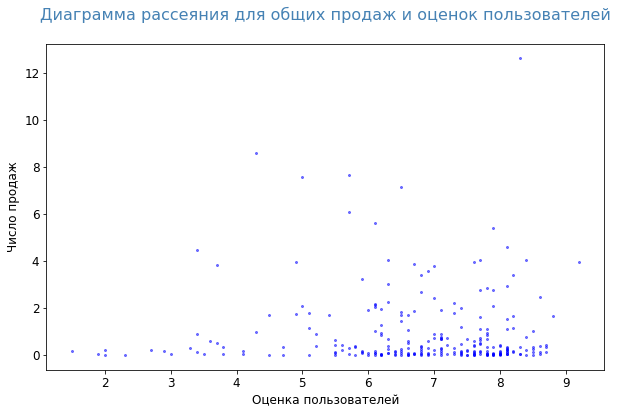

In [523]:
(data[data['platform'] == 'PS4'].query('user_score != -1')
                                .plot(kind='scatter',
                                      y='total_sales', 
                                      x='user_score', 
                                      alpha=0.5, 
                                      subplots=True, 
                                      figsize=(10,6),
                                      fontsize = 12,
                                      c = 'b', 
                                      s = 4))

plt.title('Диаграмма рассеяния для общих продаж и оценок пользователей' + "\n",
          fontsize = 16, 
          color = 'SteelBlue');

plt.xlabel('Оценка пользователей',fontsize = 12)
plt.ylabel('Число продаж',fontsize = 12)
plt.show()

Какая-либо зависимость не прослеживается. Болшая часть игр имеет оценки от 5,5. У игр с оценками пользователей меньше 3 продажи заметно меньше. Высокие продажи встречаются среди игр с оценками от 3 и выше.

Исследуем влияние оценок критиков на продажи. Найдем коэффициент корреляции Пирсона между продажами и оценками методом `corr()`, исключая пропуски.

In [524]:
data.query('platform == "PS4" and critic_score != -1')['critic_score'].corr(data['total_sales'])

0.40656790206178095

Есть умеренная линейная связь - игры с более высокими оценками критиков имеют более высокие продажи.

Изучим диаграмму рассеяния.

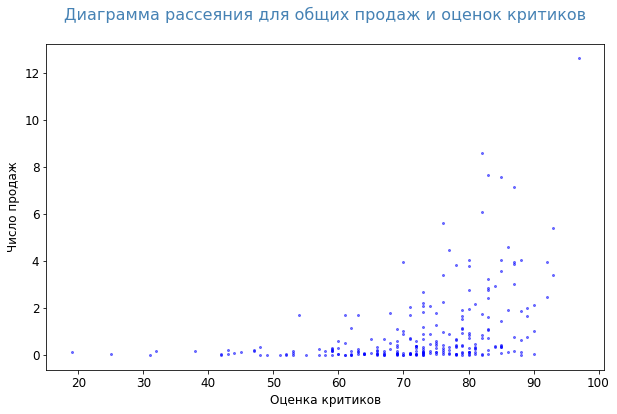

In [525]:
(data[data['platform'] == 'PS4'].query('critic_score != -1')
                                .plot(kind='scatter',
                                      y='total_sales', 
                                      x='critic_score', 
                                      alpha=0.5, 
                                      subplots=True, 
                                      figsize=(10,6),
                                      fontsize = 12,
                                      c = 'b', 
                                      s = 4))

plt.title('Диаграмма рассеяния для общих продаж и оценок критиков' + "\n",
          fontsize = 16, 
          color = 'SteelBlue');

plt.xlabel('Оценка критиков',fontsize = 12)
plt.ylabel('Число продаж',fontsize = 12)
plt.show()

Здесь зависимость между оценками критиков и продажами заметнее. Оценки критиков распределены более монотонно.

Таким образом, оценки критиков являются более показательным параметром для оценки прибыльности игр, чем оценки пользователей.

#### Сравнение полученных выводов с продажами игр на других платформах.


Построим диаграммы рассеяния для общих продаж и оценок пользователей по всем платформам. Для этого воспользуемся циклом по уникальным значениям в столбце `'platform'`. 

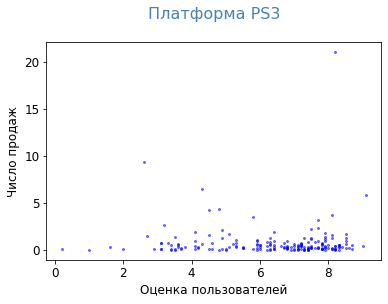

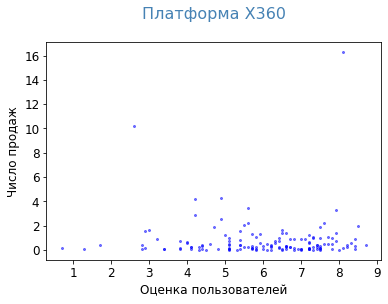

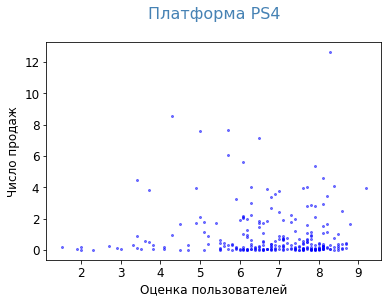

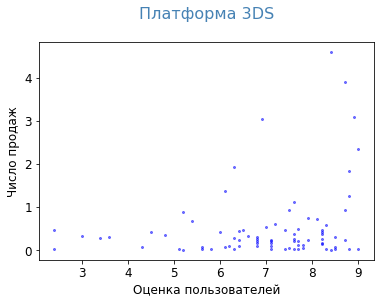

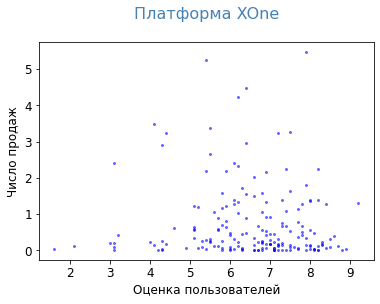

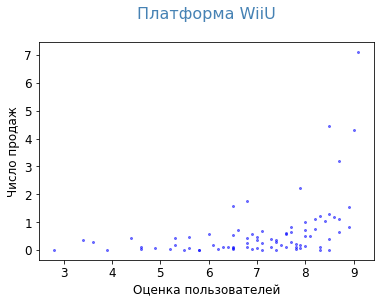

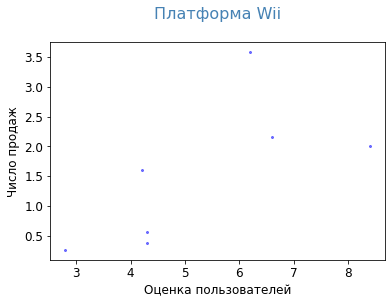

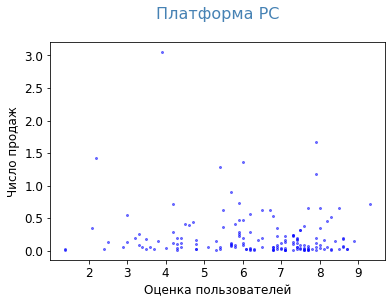

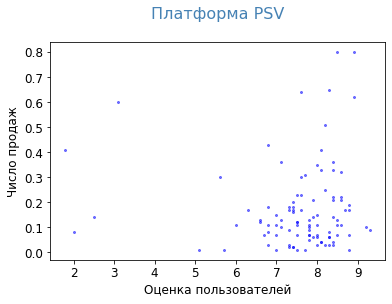

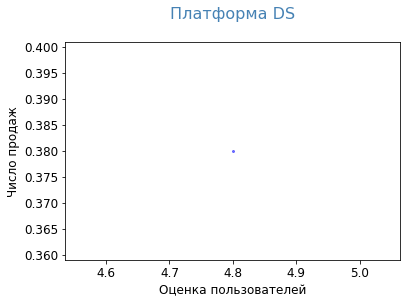

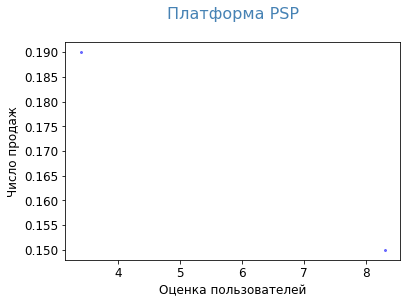

In [526]:
for platform in data['platform'].unique():
    
    (data[data['platform'] == platform].query('user_score != -1')
                                       .plot(kind='scatter',
                                             y='total_sales', 
                                             x='user_score', 
                                             alpha=0.5, 
                                             subplots=True, 
                                             figsize=(6,4),
                                             fontsize = 12,
                                             c = 'b', 
                                             s = 4))
    
    plt.title('Платформа ' + platform + "\n",
              fontsize = 16, 
              color = 'SteelBlue');
    
    plt.xlabel('Оценка пользователей',fontsize = 12)
    plt.ylabel('Число продаж',fontsize = 12)
    plt.show()

Ситуации с платформами `'PS3'`, `'X360'`, `'3DS'`, `'XOne'`, `'PC'` и `'PSV'` аналогична ситуации с `'PS4'`. Явная зависимость между оценками пользователей и продажами не прослеживается. На диаграмме рассеяния для платформы `'WiiU'` зависимость более выражена - более высокие оценки пользователей соответствуют играм с более высокими продажами.

По диаграммам для платформ `'Wii'`, `'DS'` и `'PSP'` нельзя ничего сказать, так как очень мало данных.

В целом можно утверждать, что диаграмма рассеяния для платформы `'PS4'` отражает характерное распределение игр по оценкам пользователей и продажам для платформ.

Аналогично построим диаграммы рассеяния для общих продаж и оценок критиков по всем платформам.

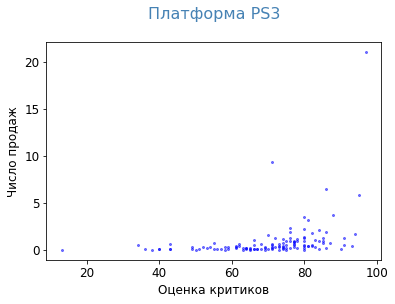

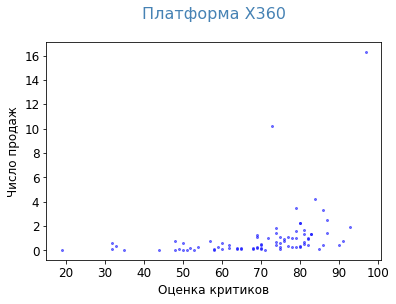

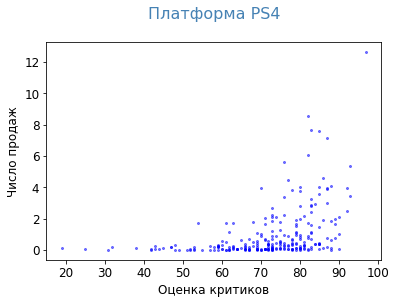

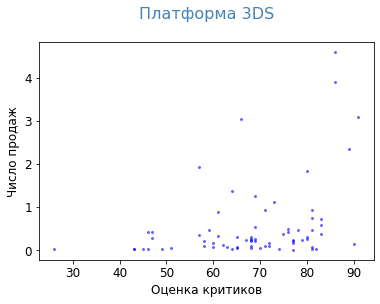

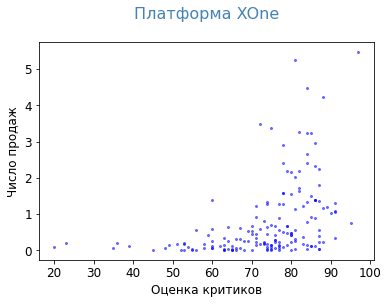

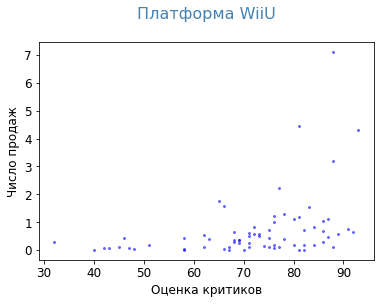

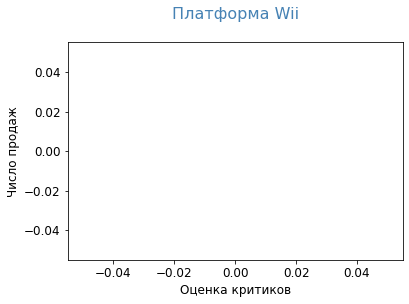

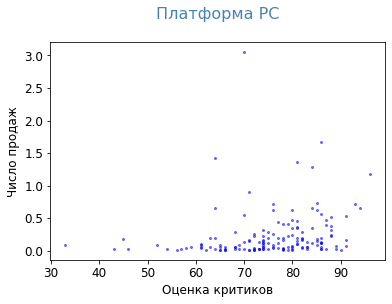

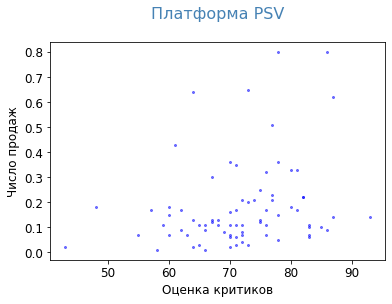

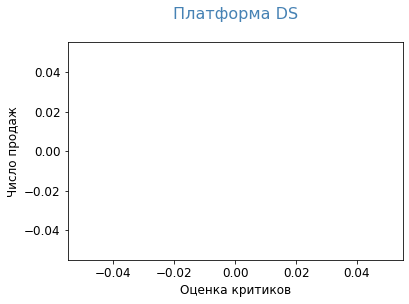

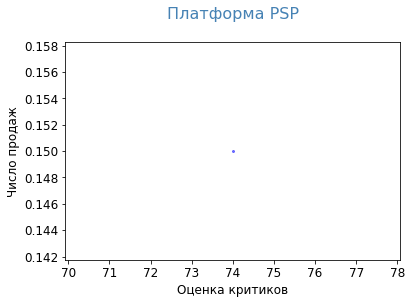

In [527]:
for platform in data['platform'].unique():
    
    (data[data['platform'] == platform].query('critic_score != -1')
                                       .plot(kind='scatter',
                                             y='total_sales', 
                                             x='critic_score', 
                                             alpha=0.5, 
                                             subplots=True, 
                                             figsize=(6,4),
                                             fontsize = 12,
                                             c = 'b', 
                                             s = 4))
    
    plt.title('Платформа ' + platform + "\n",
              fontsize = 16, 
              color = 'SteelBlue');
    
    plt.xlabel('Оценка критиков',fontsize = 12)
    plt.ylabel('Число продаж',fontsize = 12)
    plt.show()

Диаграммы рассеяния для платформ `'PS4'`, `'X360'`, `'3DS'`, `'XOne'`, `'WiiU'` отражают аналогичную связь между оценками критиков и продажами, какая видна на диаграмме для `'PS4'`. На диаграммах рассеяния для платформ `'PC'` и `'PSV'` связь выражена слабо.

По диаграммам для платформ `'Wii'`, `'DS'` и `'PSP'` нельзя ничего сказать, так как очень мало данных.

В целом можно утверждать, что диаграмма рассеяния для платформы `'PS4'` отражает характерную связь между оценками критиков и продажами для платформ.

#### Анализ общего распределения игр по жанрам.

Пострим столбчатую диаграмму распределния игр по жанрам. Для этого сгруппируем данные по жанрам методом `groupby()`, найдем количество игр в каждом жанре и построим диаграмму.

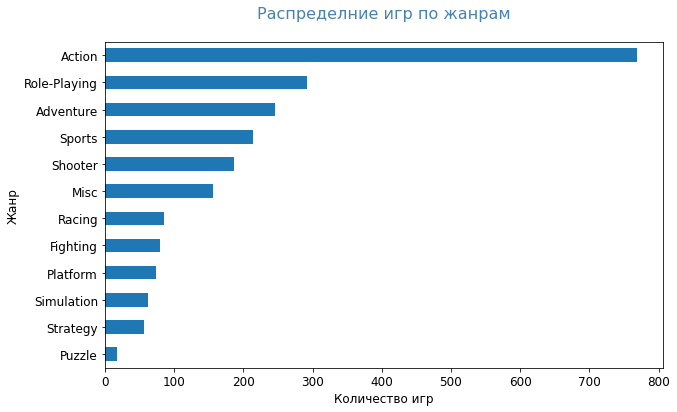

In [528]:
(data.groupby('genre')['name']
     .count()
     .sort_values(ascending = True)
     .plot(kind= 'barh', 
           figsize=(10,6), 
           legend = False, 
           fontsize = 12)
     .set_title('Распределние игр по жанрам' + "\n", 
                fontsize = 16, 
                color = 'SteelBlue'));  

plt.xlabel('Количество игр',fontsize = 12)
plt.ylabel('Жанр',fontsize = 12)
plt.show()

По жанрам игры распределены неравномерно. Больше всего игр в жанре `'Action'` - их почти в 3 раза больше, чем в любом другом. Среди других жанров нет такого резкого отличия. Меньше всего игр в жанре `'Puzzle'`.

Для определения самых прибыльных жанров нужно построить столбчатую диаграмму по медианным значениям продаж.

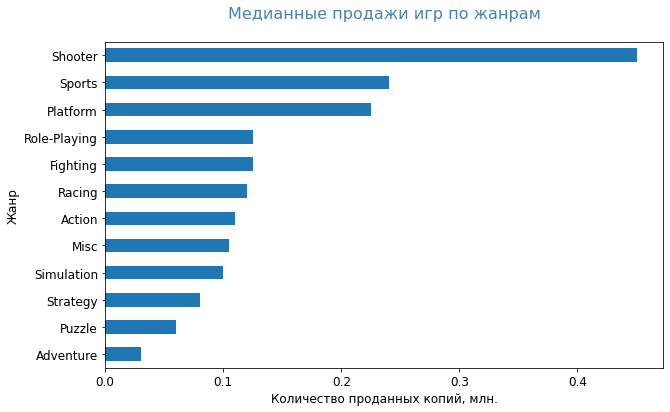

In [529]:
(data.groupby('genre')['total_sales']
     .median()
     .sort_values(ascending = True)
     .plot(kind= 'barh', 
           figsize=(10,6), 
           legend = False, 
           fontsize = 12)
     .set_title('Медианные продажи игр по жанрам' + "\n", 
                fontsize = 16, 
                color = 'SteelBlue'));  

plt.xlabel('Количество проданных копий, млн.',fontsize = 12)
plt.ylabel('Жанр',fontsize = 12)
plt.show()

Наиболее прибыльным жанром, с точки зрения медианного значения продаж, является `'Shooter'`. Этот жанр сильно выбивается среди остальных - медиана почти в два раза больше медианных значений продаж по всем другим жанрам. Затем идут жанры `'Sports'` и `'Platform'`, которые также сильно отличаются от остальных платформ. Далее медианные значения по платформам отличаются слабо.

### Составление портрета пользователя каждого региона. 

#### Определение самых популярных платформ.

Определим 5 наиболее популярных платформ в каждом регионе. 

Методом `groupby()` сгруппируем данные по столбцу `'platform'`. Для каждого региона найдем сумму продаж по платформам в соответствующих столбцах: `'na_sales'`, `'eu_sales'` и `'jp_sales'`. Отсортируем значения по убыванию и запишем первые пять платформ в переменную `na_platforms`, `eu_platforms`, `jp_platforms` для Северной Америки, Европы и Японии соответственно. Добавим в таблице строку с индексом `'others'`, куда запишем продажи по всем остальным платформам, и выведем таблицу на экран.

По каждой таблице построим круговую диаграмму.

In [530]:
#Топ-5 платформ в Северной Америке

na_platforms = data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5)

na_platforms['others'] = data['na_sales'].sum() - na_platforms.sum()

print(na_platforms)

platform
PS4       108.74
XOne       93.12
X360       81.66
PS3        63.50
3DS        38.20
others     52.51
Name: na_sales, dtype: float64


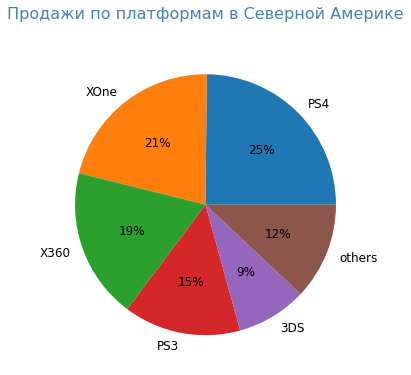

In [531]:
(na_platforms.plot(kind='pie', 
                   figsize=(6,6),
                   fontsize = 12,
                   autopct='%1.0f%%')
             .set_title('Продажи по платформам в Северной Америке' + "\n", 
                        fontsize = 16, 
                        color = 'SteelBlue'));

plt.ylabel('',fontsize = 12)
plt.show()

В Северной Америке на первом месте платформа `'PS4'`, на нее приходится четверть всех продаж. На втором - `'XOne'` с долей продаж равной 21 %. Далее идут платформы `'X360'`, `'PS3'` и `'3DS'` с разницей не более 6 %.

In [532]:
#Топ-5 платформ в Европе

eu_platforms = data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5)

eu_platforms['others'] = data['eu_sales'].sum() - eu_platforms.sum()

print(eu_platforms)

platform
PS4       141.09
PS3        67.81
XOne       51.59
X360       42.52
3DS        30.96
others     58.49
Name: eu_sales, dtype: float64


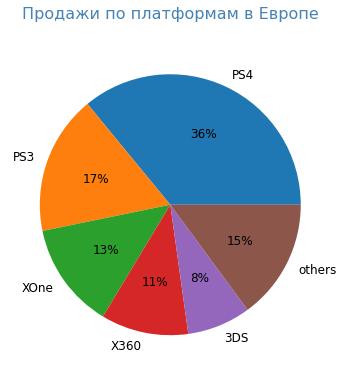

In [533]:
(eu_platforms.plot(kind='pie', 
                   figsize=(6,6),
                   fontsize = 12,
                   autopct='%1.0f%%')
             .set_title('Продажи по платформам в Европе' + "\n", 
                        fontsize = 16, 
                        color = 'SteelBlue'));

plt.ylabel('',fontsize = 12)
plt.show()

В Европе на первом месте по продажам также платформа `'PS4'`, доля продаж которой сильно превышает остальные и составляет 36 %. На втором месте `'PS3'` с долей продаж 17 %. Далее идут платформы `'XOne'`, `'X360'` и `'3DS'` с разницей не более 4 %.

In [534]:
#Топ-5 платформ в Японии

jp_platforms = data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5)

jp_platforms['others'] = data['jp_sales'].sum() - jp_platforms.sum()

print(jp_platforms)

platform
3DS       67.81
PS3       23.35
PSV       18.59
PS4       15.96
WiiU      10.88
others     4.43
Name: jp_sales, dtype: float64


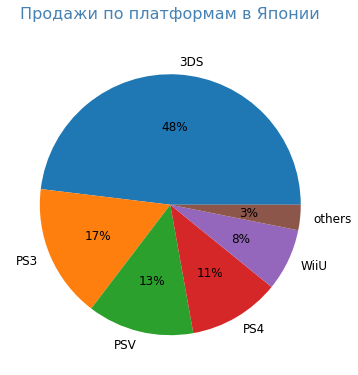

In [535]:
(jp_platforms.plot(kind='pie', 
                   figsize=(6,6),
                   fontsize = 12,
                   autopct='%1.0f%%')
             .set_title('Продажи по платформам в Японии' + "\n", 
                        fontsize = 16, 
                        color = 'SteelBlue'));

plt.ylabel('',fontsize = 12)
plt.show()

В Японии на первом месте по продажам платформа `'3DS'`, доля продаж которой еще больше превышает остальные, чем в Европе, и составляет 48 %.  На втором месте `'PS3'` с долей продаж 17 %. Далее идут платформы `'PSV'`, `'PS4'` и `'WiiU'` с разницей не более 4 %.

В регионах в топ-5 входят не одни и те же платформы. Платформы `'PS4'`, `'PS3'` и `'3DS'` входят в топ-5 во всех регионах. В Северной Америке на первом месте платформа `'PS4'` с долей продаж в 25 %, здесь продажи по самым популярным платформам распределены наиболее равномерно с разницей не более 6 %. В Европе также лидирует платформа `'PS4'`, но с более заметным отрывом по доле продаж, равной 36 %. В Японии на первом месте с наибольшим преобладанием платформа `'WiiU'`, на которую приходится 48 % продаж.  

#### Определение самых популярных жанров.

Построим столбчатые диаграммы для распределения продаж по жанрам в каждом регионе. 

Сгруппируем данные по жанрам методом `groupby()`, найдем сумму продаж для каждого жанра в данном регионе методом `agg()`. Полученную таблицу запишем в переменную и построим столбчатую диаграмму с помощью функции `barplot()`.

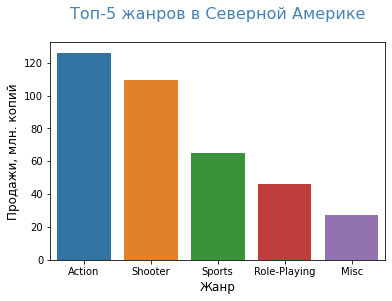

In [536]:
#Топ-5 жанров в Северной Америке

na_genres = (data.groupby('genre')
                 .agg(sales = ('na_sales','sum'))
                 .sort_values(by='sales',ascending = False)
                 .head(5))
             
sb.barplot(data=na_genres,x=na_genres.index,y=na_genres['sales'])

plt.title('Топ-5 жанров в Северной Америке' + "\n",fontsize = 16, color = 'SteelBlue');
plt.xlabel('Жанр',fontsize = 12)
plt.ylabel('Продажи, млн. копий',fontsize = 12)
plt.show()

Самым популярным жанром в Северной Америке является `'Action'`. В топ-5 также вошли жанры `'Shooter'`, `'Sports'`, `'Role-Playing'` и `'Misc'`. Продажи по этим платформам уменьшаются достаточно монотонно.

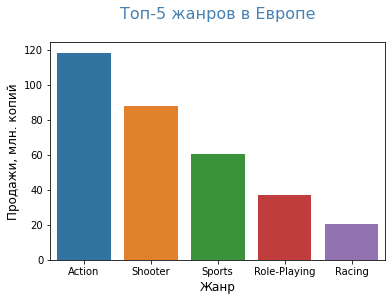

In [537]:
#Топ-5 жанров в Европе

eu_genres = (data.groupby('genre')
                 .agg(sales = ('eu_sales','sum'))
                 .sort_values(by='sales',ascending = False)
                 .head(5))
             
sb.barplot(data=eu_genres,x=eu_genres.index,y=eu_genres['sales'])

plt.title('Топ-5 жанров в Европе' + "\n",fontsize = 16, color = 'SteelBlue');
plt.xlabel('Жанр',fontsize = 12)
plt.ylabel('Продажи, млн. копий',fontsize = 12)
plt.show()

Самым популярным жанром в Европе также является `'Action'`. Распределение практически такое же, как и для Северной Америки, второе, третье и четвертое место занимают те же жанры: `'Shooter'`, `'Sports'` и `'Role-Playing'`, а на пятом месте жанр `'Racing'`.

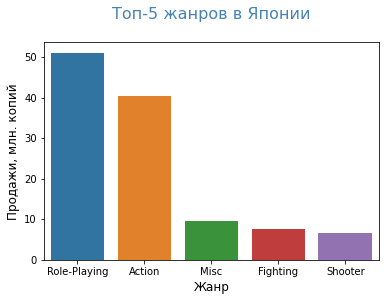

In [538]:
#Топ-5 жанров в Японии

jp_genres = (data.groupby('genre')
                 .agg(sales = ('jp_sales','sum'))
                 .sort_values(by='sales',ascending = False)
                 .head(5))
             
sb.barplot(data=jp_genres,x=jp_genres.index,y=jp_genres['sales'])

plt.title('Топ-5 жанров в Японии' + "\n",fontsize = 16, color = 'SteelBlue');
plt.xlabel('Жанр',fontsize = 12)
plt.ylabel('Продажи, млн. копий',fontsize = 12)
plt.show()

Распределение продаж по пяти самым популярным жанрам в Японии отличается от предыдущих. Первое и второе место занимают жанры `'Role-Playing'` и `'Action'`, их продажи не сильно отличаются. Затем продажи резко падают - продажи у платформ на третьем, четвертом и пятом местах в несколько раз меньше, а между собой почти равны. К ним относятся `'Misc'`, `'Fighting'` и `'Shooter'`.

Распределение продаж по самым популярным платформам в Северной Америке и Европе очень похожи, в обоих регионах на первом месте находится жанр `'Action'`. От самого популярного жанра продажи уменьшаются достаточно монотонно. В Японии распределение другое: с большим отрывом по продажам на первом месте находятся жанры `'Role-Playing'` и `'Action'`. В в несколько раз меньше продажи у остальных жанров, седи которых продажи слабо отличаются. 

#### Определение влияния рейтинга ESRB на продажи.

Рейтинг игр ESRB на основе содержания игры определяет возрастную категорию людей, для которой подходит игра. В нашем датасете используются следующие категории:

- `'E'` («Everyone») — «Для всех»: содержание вполне подходит для возрастной категории от 6 лет;
- `'E10+'` («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- `'T'` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
- `'M'` («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;

Построим столбчатые диаграммы для распределения продаж по рейтингу ESRB в каждом регионе. 

Исключая пропуски, сгруппируем данные по рейтингу методом `groupby()`, найдем сумму продаж для каждого рейтинга в данном регионе методом `agg()`. Полученную таблицу запишем в переменную и построим столбчатую диаграмму с помощью функции `barplot()`.

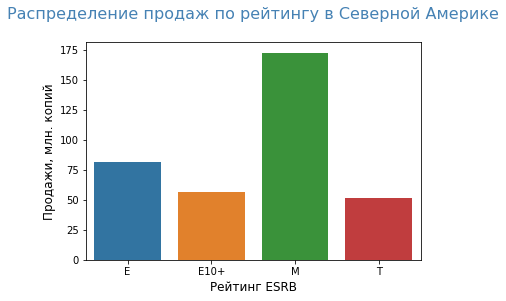

In [539]:
#Распределение продаж по рейтингу в Северной Америке 

na_rating = (data.query('rating != ""')
                 .groupby(['rating'])
                 .agg(sales = ('na_sales','sum')))
             
sb.barplot(data=na_rating,x=na_rating.index,y=na_rating['sales'])

plt.title('Распределение продаж по рейтингу в Северной Америке' + "\n",fontsize = 16, color = 'SteelBlue');
plt.xlabel('Рейтинг ESRB',fontsize = 12)
plt.ylabel('Продажи, млн. копий',fontsize = 12)
plt.show()

В Северной Америке больше всего продаж среди игр с рейтингом `'M'`. В два раза меньше продаж среди игр с рейтингом `'E'`, затем идут группы игр с рейтингом `'E10+'` и `'T'` с почти одинаковыми продажами.

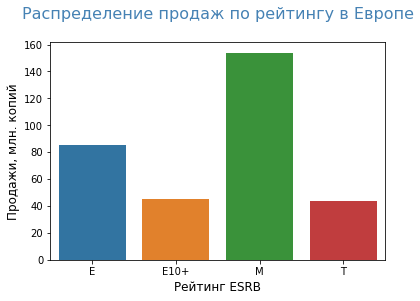

In [540]:
#Распределение продаж по рейтингу в Европе 

eu_rating = data.query('rating != ""').groupby(['rating']).agg(sales = ('eu_sales','sum'))

sb.barplot(data=eu_rating,x=eu_rating.index,y=eu_rating['sales'])

plt.title('Распределение продаж по рейтингу в Европе' + "\n",fontsize = 16, color = 'SteelBlue');
plt.xlabel('Рейтинг ESRB',fontsize = 12)
plt.ylabel('Продажи, млн. копий',fontsize = 12)
plt.show()

Идентичное распределение продаж по рейтингам в Европе.

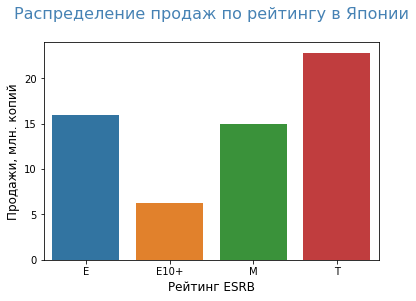

In [541]:
#Распределение продаж по рейтингу в Японии 

jp_rating = data.query('rating != ""').groupby(['rating']).agg(sales = ('jp_sales','sum'))

sb.barplot(data=jp_rating,x=jp_rating.index,y=jp_rating['sales'])

plt.title('Распределение продаж по рейтингу в Японии' + "\n",fontsize = 16, color = 'SteelBlue');
plt.xlabel('Рейтинг ESRB',fontsize = 12)
plt.ylabel('Продажи, млн. копий',fontsize = 12)
plt.show()

В Японии распределние продаж по рейтингам игр другое. Больше всего продаж среди игр с рейтингом `'T'`. Затем идут игры с рейтингом `'E'` и `'M'` с почти одинаковыми продажами. Меньше всего продаж среди игр с рейтингом `'E10+'`.

В Северной Америке и Европе распределение продаж по рейтингам идентичны: больше всего продаж среди игр с рейтингом `'M'`. В два раза меньше продаж среди игр с рейтингом `'E'`, затем идут группы игр с рейтингом `'E10+'` и `'T'` с почти одинаковыми продажами. В Японии распределние другое. Больше всего продаж среди игр с рейтингом `'T'`. Затем идут игры с рейтингом `'E'` и `'M'` с почти одинаковыми продажами. Меньше всего продаж среди игр с рейтингом `'E10+'`.

### Проверка гипотез.

#### Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки гипотезы необходимо сформулировать нулевую и альтернативную гипотезы. Нулевая гипотеза всегда формулируется как равенство двух величин. В качестве альтернативной гипотезы сформулируем двустороннюю гипотезу о том, что две величины не равны.

Сформулируем нулевую гипотезу : "Средние двух генеральных совокупностей из пользовательских оценок для платформ Xbox One и PC одинаковые".

Альтернативная гипотеза : "Средние двух генеральных совокупностей из пользовательских оценок для платформ Xbox One и PC не равны".

Набор данных по оценкам пользователей в таблице являются выборками, так как в таблице имеются пропуски. Проверим размеры имеющихся выборок. Запишем выборку из оценок пользователей для платформы `'XOne'`, исключая пропуски, в переменную `'xone_user_score'`, а для платформы `'PC'` - в переменную `'pc_user_score'`. Выведем их размер на экран.

In [542]:
xone_user_score = data.query('platform == "XOne" and user_score != -1')['user_score']

xone_user_score.count()

182

In [543]:
pc_user_score = data.query('platform == "PC" and user_score != -1')['user_score']

pc_user_score.count()

157

Выборки достаточно большие (имеют больше 30 значений), значит, выборочные средние для выборок такого размера распределены нормально, выборки независимы, поэтому для проверки нулевой гипотезы можно использовать функцию `ttest_ind()`, которая применяется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. 

Функция возвращает уровень значимости для полученной статистики разности - `p-value`. Критерием проверки нулевой гипотезы является именно эта величина, так как она представляет собой вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна.

`p-value` сравнивают с заранее заданным критическим уровнем статистической значимости `alpha`, при котором нулевая гипотеза еще не отвергается. Нулевая гипотеза отвергается, если `p-value` меньше `alpha`. Примем `alpha` равным 5 %.

В качестве аргументов функции `ttest_ind()` передаются две выборки и значение параметра `equal_var`. Выборки не равны по размеру, поэтому дисперсии не равны и в `equal_var` передаем `False`.

Результат работы функции запишем в переменную `results`. Затем сравним `p-value` с `alpha` и выведем на экран результат проверки.

In [544]:
alpha = .05

results = st.ttest_ind(xone_user_score,pc_user_score,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13888973874685429
Не получилось отвергнуть нулевую гипотезу


Значит, принимаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные"

Сформулируем нулевую гипотезу : "Средние двух генеральных совокупностей из пользовательских оценок для жанров Action и Sports одинаковые".

Альтернативная гипотеза : "Средние двух генеральных совокупностей из пользовательских оценок для жанров Action и Sports не равны".

Набор данных по оценкам пользователей в таблице являются выборками, так как в таблице имеются пропуски. Проверим размеры имеющихся выборок.

In [545]:
action_user_score = data.query('genre == "Action" and user_score != -1')['user_score']

action_user_score.count()

391

In [546]:
sports_user_score = data.query('genre == "Sports" and user_score != -1')['user_score']

sports_user_score.count()

160

Выборки достаточно большие (имеют больше 30 значений), значит, выборочные средние для выборок такого размера распределены нормально, поэтому можно использовать функцию `ttest_ind()`. Выборки не равны по размеру, поэтому дисперсии не равны.

Примем `alpha` равным 5 %.

Результат работы функции запишем в переменную `results`. Затем проводим сравним `p-value` с `alpha` и выведем на экран результат проверки.

In [547]:
alpha = .05 

results = st.ttest_ind(action_user_score,sports_user_score,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6948835429264077e-20
Отвергаем нулевую гипотезу


Значит, принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

Было проведено исследование о том, какие закономерности влияют на успешность игры на рынке компьютерных игр. Входные данные — архив о продажах компьютерных игр в интернет-магазине за период до 2016 года.

Результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

1. Были изучены следующие аспекты:

    - Количество выпущенных игр в разные годы.
    
      Медианное значение соответствует 2007 году, среднее - 2006, мода - 2008. Величина стандартного отклонения равна 6 годам. Годы релиза распределены от 1980 года до 2016. Ниже приведен график зависимости количества выпущенных игр от года выпуска.

      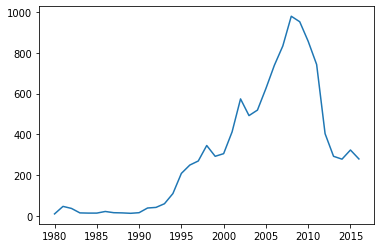

      По графику видно, что к 1995 году произошел резкий рост количества выпускаемых игр, до этого года игр было значительно меньше. С 1980 года количество выпускаемых игр в год преимущественно растет, в 2008 году достигает максимума и затем резко падает. Это может быть связано с тем, что сначала компьютерные игры были простые, эта сфера интенсивно развивалась и количество выпускаемых игр росло, так как на их создание уходило не слишком много времени. После 2008 года тенденция изменилась: игры стали развиваться экстенсивно, они стали более сложными и масштабными, на их создание стало уходить значительно больше времени.
    - Распределение проданных игр по платформам. Распределение по годам для платформ с наибольшими суммарными продажами.
    
      Медианное количество продаж составляет 200 млн. экземпляров, среднее - 288 млн. экземпляров. Стандартное отклонение - 348 млн. экземпляров - больше медианы и среднего, это связано с большим диапазоном величин - от минимального в 30 тыс. экземпляров до максимального в 1,256 млрд экземпляров.

      К наиболее популярным платформам относятся шесть платформ, продажи по которым в два и более раз отличаются от остальных: `'PS2'`, `'X360'`, `'PS3'`, `'Wii'`, `'DS'`, `'PS'`. Ниже приведен график, иллюстрирующий динамику продаж по годам на этих платформах.

    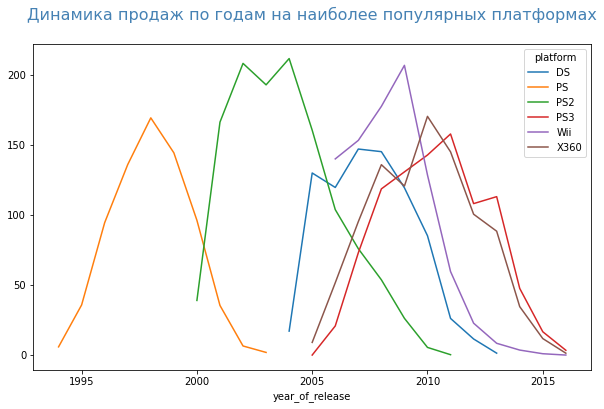
      
      По графику видно, что к концу срока существования платформы скорость падения продаж уменьшается. А с появлением популярной платформы продажи резко растут. Среднее время жизни платформы - 10 лет.
    
    - Определние актуального периода для прогноза на 2017 год.
    
      Актуальным был принят период с 2013 по 2016 год.
    
      Выбор обусловлен следующим. С учетом того, что формат игр сильно изменился с момента зарождения этой сферы, для прогноза продаж на 2017 год был взят тот период, на котором тенденция изменения продаж сохраняется примерно постоянной. На графике динамики общих продаж видно, что к 2013 году резкое падение количества продаж замедляется и затем продажи изменяются слабо. Также по графику с динамикой продаж по годам на наиболее популярных платформах видно, что продажи для них к 2016 году очень упали, срок их существования либо завершился, либо близок к завершению. Поэтому лучше исследовать лишь последние несколько лет, чтобы больший вклад в продажи был обусловлен более новыми платформами. Так как средний срок существования платформы - 10 лет, лучше взаять для анализа последние 4-5 лет, чтобы оценить актуальность платформы.
    
      Далее исследовались данные только за актуальный период.
    
    - Анализ платформ, которые лидируют по продажам, а также продажи которых растут или падают. Опредление потенциально прибыльных платформ.
    
      Ниже приведен график, отображающий динамику изменения продаж для оставшихся одиннадцати платформ.
    
      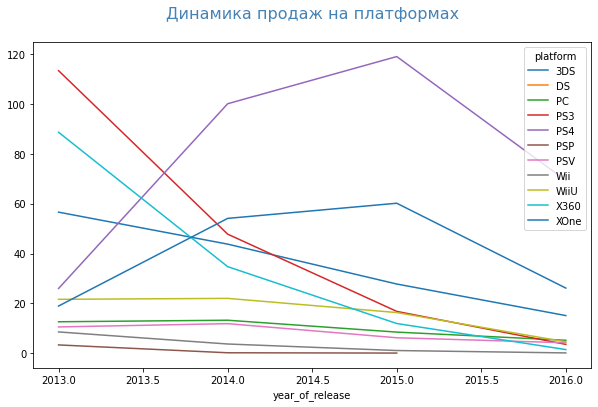
    
      Лидируют по продажам платформы `'PS4'`, `'XOne'`, `'3DS'`. Однако по всем трем платформам продажи падают. За период 2013 - 2016 годы платформы `'PS4'` и `'XOne'` прошли через максимум, а продажи для платформы `'3DS'` уменьшаются монотонно и медленнее, чем для `'PS4'` и `'XOne'`.

      С 2015 на 2016 год по всем платформам продажи упали, но по некоторым палформам они падают медленнее, из-за чего они могут выходить вперед.

      Платформа `'PSP'` уже прекратила свое существование, так как в 2016 году продаж не было. Существование платформ `'Wii'`, `'X360'`, `'PS3'` и `'WiiU'` подходит к завершению, продажи будут уменьшаться, но нельзя утверждать, что в 2017 году их не будет совсем.

      Можно предположить, что в 2017 на первом месте все равно останется платформа `'PS4'`, дальше будут платформы `'XOne'` и `'3DS'`, а на четвертом месте останется платформа `'PC'`.

      Продажи на менее популярной платформе `'PSV'` изменяются очень медленно, поэтому, сокрее всего, эта платформа будет на пятом месте.
      
      Рекомендация: потенцально прибыльными платформами можно считать `'PS4'`, `'XOne'`, `'3DS'` и `'PC'`.
    
    - Анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    
      Ниже приведены диаграммы размаха для четырех наиболее популярных платформ: `'PS4'`, `'XOne'`, `'3DS'` и `'PC'`.

      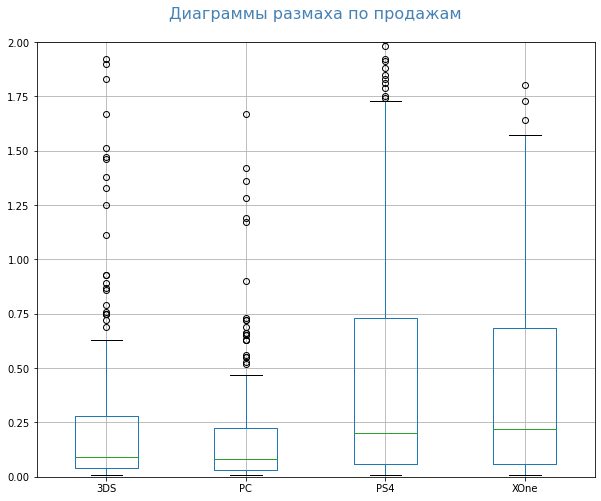

      Для всех платформ продажи распределены по играм неравномерно - есть игры с сильно завышенными продажами. Особенно это выражено для игровых приставок. Для ПК это выражено меньше. Наибольший разброс относительно полуторного межквартильного размаха наблюдается у портативной приставки `'3DS'`. У приставок `'PS4'` и `'XOne'` квартили находятся примерно на одном уровне, а выбросы у `'PS4'` почти в два раза больше.
      
      Медианные продажи больше на платформах `'PS4'` и `'XOne'`.

      Можно утверждать, что основная прибыль на игровых приставках обеспечивается небольшим количеством очень успешных игр.
    
    - Исследование влияния  оценок пользователей и критиков на продажи внутри одной популярной платформы.
    
      Наиболее популярной платформой является `'PS4'`. Коэффициент корреляции Пирсона между отзывами пользователей к играм и продажами равен -0,03, следовательно, какой-либо существенной линейной связи нет. Коэффициент корреляции Пирсона между оценками критиков и продажами равен 0,41, следовательно, есть умеренная линейная связь - игры с более высокими оценками критиков имеют более высокие продажи. 

      Таким образом, оценки критиков являются более показательным параметром для оценки прибыльности игр, чем оценки пользователей.
    
    - Сравнение полученных выводов с продажами игр на других платформах.
    
      Были построены диграммы рассеяния для всех платформ по оценкам пользователей.
      
      Ситуации с платформами `'PS3'`, `'X360'`, `'3DS'`, `'XOne'`, `'PC'` и `'PSV'` аналогична ситуации с `'PS4'`. Явная зависимость между оценками пользователей и продажами не прослеживается. На диаграмме рассеяния для платформы `'WiiU'` зависимость более выражена - более высокие оценки пользователей соответствуют играм с более высокими продажами. По диаграммам для платформ `'Wii'`, `'DS'` и `'PSP'` нельзя ничего сказать, так как очень мало данных.

      Были построены диграммы рассеяния для всех платформ по оценкам критиков.

      Диаграммы рассеяния для платформ `'PS4'`, `'X360'`, `'3DS'`, `'XOne'`, `'WiiU'` отражают аналогичную связь между оценками критиков и продажами, какая видна на диаграмме для `'PS4'`. На диаграммах рассеяния для платформ `'PC'` и `'PSV'` связь выражена слабо. По диаграммам для платформ `'Wii'`, `'DS'` и `'PSP'` нельзя ничего сказать, так как очень мало данных.

      В целом, можно утверждать, что платформа `'PS4'` отражает характерную связь между оценками критиков или пользователей и продажами для всех платформ.
      
      Рекомендация: при определении потенциально популярных продуктов можно использовать отзывы критиков.
    
    - Анализ общего распределения игр по жанрам. 

      Наиболее прибыльным жанром, с точки зрения медианного значения продаж, является `'Shooter'`. Этот жанр сильно выбивается среди остальных - медиана почти в два раза больше медианных значений продаж по всем другим жанрам. Затем идут жанры `'Sports'` и `'Platform'`, которые также сильно отличаются от остальных платформ. Далее медианные значения по платформам отличаются слабо.
      
      Рекомендация: при определении потенциально популярных продуктов большее внимание уделить играм жанра `'Shooter'`.
    
- Составление портрета пользователя каждого региона. Нужно определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5).

      Топ-5 в Северной Америке: `'PS4'`, `'XOne'`, `'X360'`, `'PS3'` и `'3DS'`.

      Топ-5 в Европе: `'PS4'`, `'PS3'`, `'XOne'`, `'X360'` и `'3DS'`.

      Топ-5 в Японии: `'3DS'`, `'PS3'`, `'PSV'`, `'PS4'` и `'WiiU'`.

      В регионах в топ-5 входят не одни и те же платформы. Платформы `'PS4'`, `'PS3'` и `'3DS'` входят в топ-5 во всех регионах. в Северной Америке на первом месте платформа `'PS4'` с долей продаж в 25 %, здесь продажи по самым популярным платформам распределены наиболее равномерно с разницей не более 6 %. В Европе также лидирует платформа `'PS4'`, но с более заметным отрывом по доле продаж, равной 36 %. В Японии на первом месте с наибольшим преобладанием платформа `'WiiU'`, на которую приходится 48 % продаж.  
      
      Рекомендация: учитывать регион при определении потенциально популярных продуктов в зависимости от платформы.
    
    - Самые популярные жанры (топ-5).
    
      Топ-5 в Северной Америке: `'Action'`, `'Shooter'`, `'Sports'`, `'Role-Playing'` и `'Misc'`. 

      Топ-5 в Европе: `'Action'`, `'Shooter'`, `'Sports'`, `'Role-Playing'` и `'Racing'`.

      Топ-5 в Японии: `'Role-Playing'`, `'Action'`, `'Misc'`, `'Fighting'` и `'Shooter'`.

      Распределение продаж по самым популярным платформам в Северной Америке и Европе очень похожи, в обоих регионах на первом месте находится жанр `'Action'`. От самого популярного жанра продажи уменьшаются достаточно монотонно. В Японии распределение другое: с большим отрывом по продажам на первом месте находятся жанры `'Role-Playing'` и `'Action'`. В в несколько раз меньше продажи у остальных жанров, седи которых продажи слабо отличаются. 
      
      Рекомендация: учитывать регион при определении потенциально популярных продуктов в зависимости от жанра.
    
    - Влияние рейтинга ESRB на продажи в отдельном регионе.
    
      В Северной Америке и Европе распределения продаж по рейтингам идентичны: больше всего продаж среди игр с рейтингом `'M'`. В два раза меньше продаж среди игр с рейтингом `'E'`, затем идут группы игр с рейтингом `'E10+'` и `'T'` с почти одинаковыми продажами. В Японии распределние другое. Больше всего продаж среди игр с рейтингом `'T'`. Затем идут игры с рейтингом `'E'` и `'M'` с почти одинаковыми продажами. Меньше всего продаж среди игр с рейтингом `'E10+'`.
      
      Рекомендация: учитывать регион при определении потенциально популярных продуктов в зависимости от рейтинга ESRB.
    
- Проверка гипотез:

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
      Гипотеза подтвердилась.
    
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
      Гипотеза не подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные.
      
Общие рекомендации:

Для оценки успешности игр, определения потенциально популярных продуктов и планирования рекламных кампаний, потенцально прибыльными платформами, в общем случае, можно считать `'PS4'`, `'XOne'`, `'3DS'` и `'PC'`; можно использовать отзывы критиков; большее внимание уделить играм жанра `'Shooter'`. 

Следует учитывать регион при использовании следующих критериев для определения потенциально популярных продуктов:
- наиболее популярные платформы;
- наиболее популярные жанры;
- рейтинг ESRB.